## Image Classification Using CNNs on the CIFAR-10 Dataset

#### Import necessary libraries

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Define the transformation
transform = transforms.ToTensor()

In [28]:
# Download CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#### CIFAR10 sample

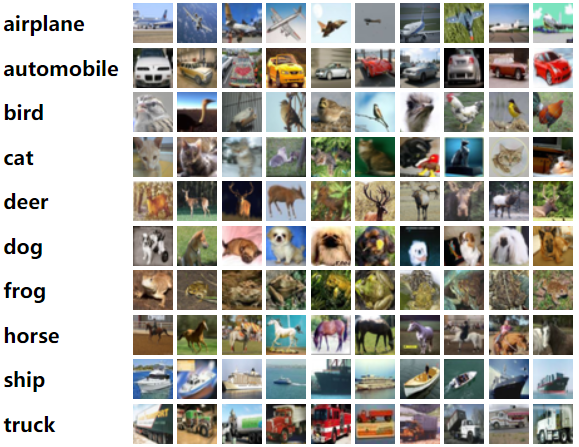

In [29]:
from PIL import Image
from IPython.display import display
img = Image.open('CIFAR_10_sample.png')
display(img)

#### Dataset Overview

The CIFAR-10 dataset is a widely used benchmark in machine learning for image classification tasks. It consists of 60,000 color images sized 32x32 pixels, divided into 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. Each class contains 6,000 images, with 50,000 used for training and 10,000 for testing. The images are in RGB format with three channels, making the dataset well-suited for evaluating deep learning models, especially convolutional neural networks (CNNs).

In [30]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [31]:
trainset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [32]:
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

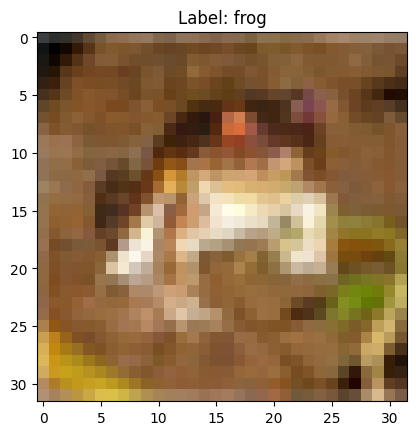

In [33]:
image, label = trainset[0]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

In [34]:
img_tensor, label = trainset[0]
print(img_tensor.shape, label)

torch.Size([3, 32, 32]) 6


In [35]:
print(img_tensor[:,5:10,15:20])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.3843, 0.3686, 0.3804, 0.3255, 0.3451],
         [0.2902, 0.3961, 0.4118, 0.2549, 0.2275],
         [0.2824, 0.7098, 0.8196, 0.4902, 0.2667],
         [0.3373, 0.7961, 0.8510, 0.6353, 0.3922],
         [0.4039, 0.5961, 0.5804, 0.5529, 0.4745]],

        [[0.2549, 0.2431, 0.2471, 0.2196, 0.2275],
         [0.1608, 0.2000, 0.2196, 0.1451, 0.1412],
         [0.1216, 0.4000, 0.4980, 0.2980, 0.1569],
         [0.1529, 0.4157, 0.4275, 0.3529, 0.2275],
         [0.2078, 0.2745, 0.2510, 0.3098, 0.2941]],

        [[0.1059, 0.0824, 0.1255, 0.1490, 0.1412],
         [0.0667, 0.0824, 0.0902, 0.0627, 0.0745],
         [0.0667, 0.2706, 0.3176, 0.1843, 0.0902],
         [0.0588, 0.2196, 0.2431, 0.2784, 0.1922],
         [0.1020, 0.1294, 0.1451, 0.2392, 0.2235]]])
tensor(1.) tensor(0.)


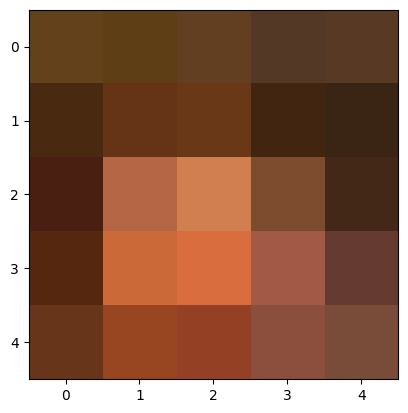

In [36]:
patch = img_tensor[:, 5:10, 15:20]

# Rearrange dimensions to [H, W, C]
patch = patch.permute(1, 2, 0)

plt.imshow(patch)

plt.show()


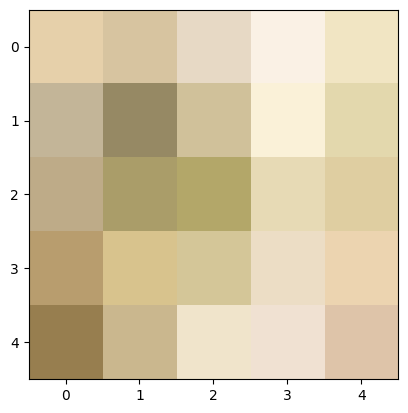

In [37]:
patch = img_tensor[:, 15:20, 20:25]

# Rearrange dimensions to [H, W, C]
patch = patch.permute(1, 2, 0)

plt.imshow(patch)

plt.show()

In [38]:
# Transform to convert images to tensors
transform = transforms.ToTensor()

In [39]:
len(trainset)

50000

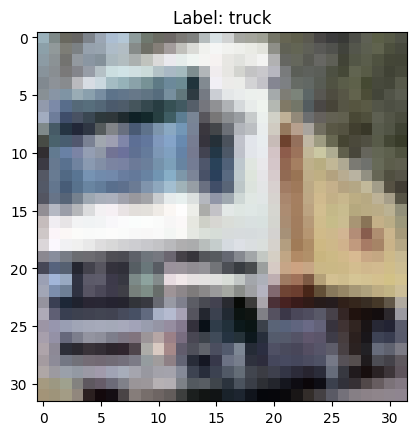

In [40]:
image, label = trainset[1]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

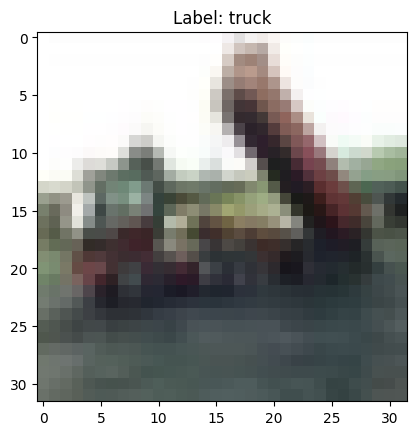

In [41]:
image, label = trainset[2]

# Convert from [C, H, W] → [H, W, C]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.show()

### Training and Validation Datasets

In [42]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(trainset, [40000, 10000])
len(train_ds), len(val_ds)

(40000, 10000)

In [43]:
import torch.nn as nn

input_size = 3 * 32 * 32  # For CIFAR-10 RGB images
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [44]:
print(model.bias.shape)

torch.Size([10])


In [45]:
model.bias

Parameter containing:
tensor([-0.0019, -0.0028,  0.0118, -0.0133, -0.0164,  0.0091,  0.0131,  0.0139,
         0.0012, -0.0062], requires_grad=True)

In [46]:
print(model.weight.shape)

torch.Size([10, 3072])


In [47]:
model.weight

Parameter containing:
tensor([[-1.4807e-02, -1.2496e-02, -2.0832e-03,  ...,  1.7172e-02,
          7.4439e-04,  7.8994e-03],
        [ 9.7603e-05, -3.5332e-03,  4.0021e-03,  ..., -1.0602e-02,
         -7.7129e-03,  1.5245e-02],
        [-6.0780e-03, -6.1851e-03, -6.0704e-03,  ..., -1.2161e-02,
         -1.7001e-02,  9.9549e-03],
        ...,
        [-2.8813e-03, -1.7554e-02,  8.5461e-03,  ...,  1.1908e-02,
         -1.4134e-02, -1.4070e-02],
        [-1.1769e-02,  2.1091e-04, -2.1568e-04,  ..., -7.7638e-03,
         -6.9973e-03, -3.4978e-03],
        [-1.5394e-02, -1.2146e-02,  1.1079e-02,  ..., -1.1451e-03,
          1.2393e-02, -6.9769e-03]], requires_grad=True)

In [48]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [49]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images.view(images.size(0), -1))
    break

tensor([2, 5, 0, 3, 3, 7, 9, 7, 4, 0, 0, 5, 2, 2, 0, 5, 4, 1, 9, 6, 7, 2, 6, 7,
        7, 7, 9, 7, 2, 6, 1, 5, 1, 9, 1, 0, 6, 5, 5, 2, 1, 6, 3, 9, 0, 4, 7, 7,
        5, 3, 8, 0, 0, 4, 9, 0, 8, 5, 3, 6, 6, 4, 0, 0, 0, 7, 9, 6, 0, 0, 8, 2,
        6, 8, 1, 5, 7, 6, 5, 7, 2, 4, 5, 7, 8, 6, 7, 0, 2, 2, 6, 7, 2, 4, 9, 9,
        4, 2, 1, 6, 6, 3, 6, 6, 8, 6, 5, 3, 1, 0, 0, 9, 7, 5, 2, 2, 0, 2, 2, 0,
        6, 7, 4, 9, 1, 4, 7, 9])
torch.Size([128, 3, 32, 32])


In [50]:
import torch.nn as nn

input_size = 32 * 32
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)


In [51]:
print(model.weight.shape)
model.weight

torch.Size([10, 1024])


Parameter containing:
tensor([[-0.0141, -0.0294,  0.0155,  ..., -0.0268, -0.0208, -0.0027],
        [-0.0072, -0.0212, -0.0259,  ...,  0.0110,  0.0297,  0.0287],
        [-0.0180,  0.0061, -0.0009,  ...,  0.0173, -0.0292, -0.0114],
        ...,
        [-0.0116, -0.0033, -0.0027,  ...,  0.0157, -0.0144,  0.0164],
        [-0.0084, -0.0132, -0.0308,  ...,  0.0126, -0.0130, -0.0123],
        [ 0.0037,  0.0175, -0.0310,  ..., -0.0115,  0.0307, -0.0029]],
       requires_grad=True)

In [52]:
images.shape

torch.Size([128, 3, 32, 32])

In [53]:
images.reshape(128, 3072).shape

torch.Size([128, 3072])

In [54]:
import torch.nn as nn

class Cifar10Model(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 3 * 32 * 32
        num_classes = 10
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1,3072)
        out = self.linear(xb)
        return out

model = Cifar10Model()


In [55]:
model.linear

Linear(in_features=3072, out_features=10, bias=True)

In [56]:
print(model.linear.weight.shape, model.linear.bias.shape )

torch.Size([10, 3072]) torch.Size([10])


In [57]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0102,  0.0054,  0.0027,  ..., -0.0111,  0.0028, -0.0088],
         [ 0.0122,  0.0069,  0.0009,  ...,  0.0086,  0.0135,  0.0154],
         [-0.0074,  0.0151,  0.0010,  ..., -0.0165,  0.0087, -0.0121],
         ...,
         [ 0.0036,  0.0092, -0.0130,  ..., -0.0051, -0.0057, -0.0136],
         [-0.0130,  0.0144,  0.0114,  ...,  0.0128,  0.0049, -0.0145],
         [ 0.0034,  0.0019,  0.0058,  ...,  0.0041,  0.0068,  0.0114]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0066,  0.0111, -0.0027,  0.0136, -0.0097, -0.0034, -0.0177,  0.0025,
          0.0050, -0.0045], requires_grad=True)]

In [59]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1838,  0.3602,  0.0302,  0.2112, -0.1557, -0.1869, -0.4601,  0.3915,
         -0.0064, -0.0176],
        [ 0.2913,  0.2575,  0.3972,  0.3686,  0.1401, -0.2358, -0.6763,  0.4027,
          0.0756,  0.0047]])


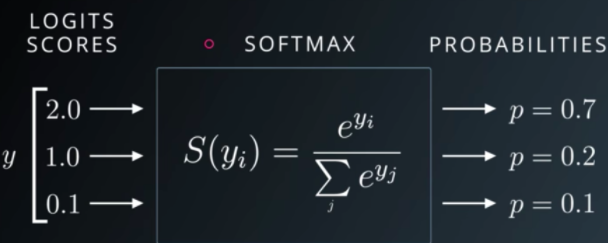

In [60]:
img = Image.open('SOFTMAX.png')
display(img)